In [38]:
import pandas as pd, spacy as sp
import matplotlib.pyplot as plt

In [2]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

In [3]:
file = "Downloads/Fake_Real_News_Data.csv"

In [4]:
df = pd.read_csv(file)

In [5]:
df

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL
...,...,...,...,...
6330,6330,Obama To Limit Police Acquisition Of Some Mili...,Obama To Limit Police Acquisition Of Some Mili...,REAL
6331,6331,EU using taxpayer money to give Muslim invader...,BNI Store Oct 29 2016 EU using taxpayer money ...,FAKE
6332,6332,Watching These 55 ISIS Terrorists Get Blown to...,Next Story → Judge Judy LOSES IT on Hood Rat: ...,FAKE
6333,6333,America’s Streets Will Run With Blood- Mike Adams,America’s Streets Will Run With Blood- Mike Ad...,FAKE


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
df

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL
...,...,...,...
6330,Obama To Limit Police Acquisition Of Some Mili...,Obama To Limit Police Acquisition Of Some Mili...,REAL
6331,EU using taxpayer money to give Muslim invader...,BNI Store Oct 29 2016 EU using taxpayer money ...,FAKE
6332,Watching These 55 ISIS Terrorists Get Blown to...,Next Story → Judge Judy LOSES IT on Hood Rat: ...,FAKE
6333,America’s Streets Will Run With Blood- Mike Adams,America’s Streets Will Run With Blood- Mike Ad...,FAKE


In [10]:
nlp = sp.load('en_core_web_sm', disable=['parser', 'ner'])

In [11]:
nlp

In [12]:
nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [13]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

**There is a good balance between the Real and Fake news in the dataset.**

In [14]:
df['tokens'] = batch_preprocess_texts(df['text'], remove_stopwords=False, remove_punct=False, nlp = nlp)

6335it [02:52, 36.65it/s] 


In [15]:
df

,title,text,label,tokens
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c..."
...,...,...,...,...
6330,Obama To Limit Police Acquisition Of Some Mili...,Obama To Limit Police Acquisition Of Some Mili...,REAL,"[obama, to, limit, police, acquisition, of, so..."
6331,EU using taxpayer money to give Muslim invader...,BNI Store Oct 29 2016 EU using taxpayer money ...,FAKE,"[bni, store, oct, 29, 2016, eu, using, taxpaye..."
6332,Watching These 55 ISIS Terrorists Get Blown to...,Next Story → Judge Judy LOSES IT on Hood Rat: ...,FAKE,"[next, story, →, judge, judy, loses, it, on, h..."
6333,America’s Streets Will Run With Blood- Mike Adams,America’s Streets Will Run With Blood- Mike Ad...,FAKE,"[america, ’s, streets, will, run, with, blood-..."


In [16]:
df['lemmas'] = batch_preprocess_texts(df['text'], use_lemmas=True, nlp = nlp)

6335it [02:50, 37.20it/s] 


In [17]:
df

,title,text,label,tokens,lemmas
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme..."
...,...,...,...,...,...
6330,Obama To Limit Police Acquisition Of Some Mili...,Obama To Limit Police Acquisition Of Some Mili...,REAL,"[obama, to, limit, police, acquisition, of, so...","[obama, limit, police, acquisition, military, ..."
6331,EU using taxpayer money to give Muslim invader...,BNI Store Oct 29 2016 EU using taxpayer money ...,FAKE,"[bni, store, oct, 29, 2016, eu, using, taxpaye...","[bni, store, oct, 29, 2016, eu, taxpayer, mone..."
6332,Watching These 55 ISIS Terrorists Get Blown to...,Next Story → Judge Judy LOSES IT on Hood Rat: ...,FAKE,"[next, story, →, judge, judy, loses, it, on, h...","[story, →, judge, judy, loses, hood, rat, soun..."
6333,America’s Streets Will Run With Blood- Mike Adams,America’s Streets Will Run With Blood- Mike Ad...,FAKE,"[america, ’s, streets, will, run, with, blood-...","[america, street, run, blood-, mike, adams, vi..."


In [18]:
df['lemmas-joined'] = df['lemmas'].map(lambda x:" ".join(x))

In [19]:
df

,title,text,label,tokens,lemmas,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...
...,...,...,...,...,...,...
6330,Obama To Limit Police Acquisition Of Some Mili...,Obama To Limit Police Acquisition Of Some Mili...,REAL,"[obama, to, limit, police, acquisition, of, so...","[obama, limit, police, acquisition, military, ...",obama limit police acquisition military style ...
6331,EU using taxpayer money to give Muslim invader...,BNI Store Oct 29 2016 EU using taxpayer money ...,FAKE,"[bni, store, oct, 29, 2016, eu, using, taxpaye...","[bni, store, oct, 29, 2016, eu, taxpayer, mone...",bni store oct 29 2016 eu taxpayer money muslim...
6332,Watching These 55 ISIS Terrorists Get Blown to...,Next Story → Judge Judy LOSES IT on Hood Rat: ...,FAKE,"[next, story, →, judge, judy, loses, it, on, h...","[story, →, judge, judy, loses, hood, rat, soun...",story → judge judy loses hood rat sound stupid...
6333,America’s Streets Will Run With Blood- Mike Adams,America’s Streets Will Run With Blood- Mike Ad...,FAKE,"[america, ’s, streets, will, run, with, blood-...","[america, street, run, blood-, mike, adams, vi...",america street run blood- mike adams violence ...


In [20]:
real_news = df['label'].str.contains("REAL")
fake_news = df['label'].str.contains("FAKE")

In [21]:
df[real_news]['lemmas-joined'].apply(len).mean()

3212.7877641122673

In [22]:
df[fake_news]['lemmas-joined'].apply(len).mean()

2524.829329962073

There are about 3212 words in real articles and 2524 words in fake articles. Real news is about 688 words longer than fake news. 

In [23]:
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

In [30]:
real_lemmas_joined = " ".join(df[real_news]['lemmas-joined'])

In [32]:
fake_lemmas_joined = " ".join(df[fake_news]['lemmas-joined'])

In [43]:
real_word_cloud = WordCloud(random_state = 42, colormap="Greens").generate(real_lemmas_joined)

In [50]:
fake_word_cloud = WordCloud(random_state = 42, colormap="Oranges").generate(fake_lemmas_joined)

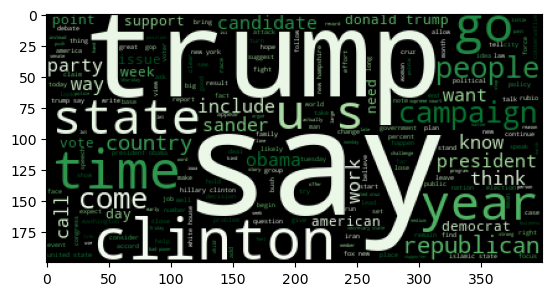

In [45]:
plt.imshow(real_word_cloud)

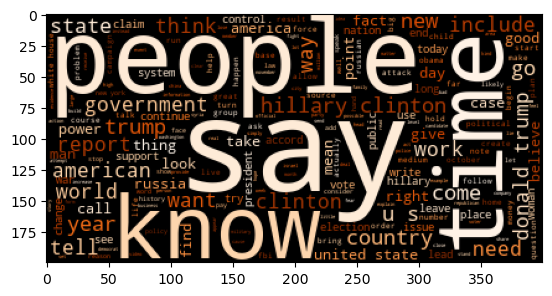

In [48]:
plt.imshow(fake_word_cloud)

In [56]:
real_list = df[real_news]['lemmas'].explode().tolist()

In [57]:
fake_list = df[fake_news]['lemmas'].explode().tolist()

In [59]:
real_news_dist = FreqDist(real_list)

In [60]:
fake_news_dist = FreqDist(fake_list)

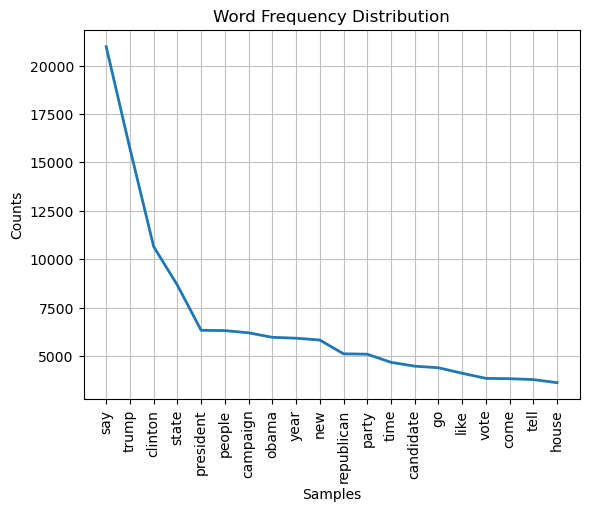

<Axes: title={'center': 'Word Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [63]:
real_news_dist.plot(20, title="Word Frequency Distribution")

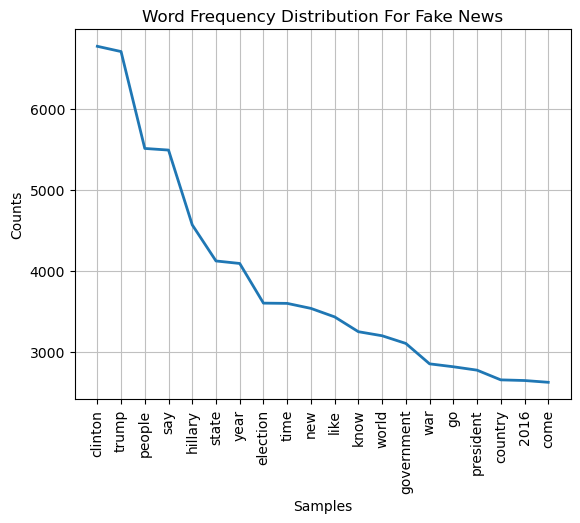

<Axes: title={'center': 'Word Frequency Distribution For Fake News'}, xlabel='Samples', ylabel='Counts'>

In [64]:
fake_news_dist.plot(20, title="Word Frequency Distribution For Fake News")